# 중심극한정리

In [17]:
import numpy as np
x=np.random.randn(100)

In [18]:
print ("mean\t: {}".format(np.mean(x)))
print ("median\t: {}".format(np.median(x)))

mean	: 0.01457211185137352
median	: 0.00028767139866872453


In [19]:
from scipy.stats import skew

#대칭성
print ("skewness\t: {}".format(skew(x)))

skewness	: 0.058747245203349195


In [20]:
from scipy.stats import kurtosis

#뾰족한 정도
print ("kurtosis\t: {}".format(kurtosis(x)))

kurtosis	: 0.14522548488408393


In [6]:
import os
os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/bin/python3"

In [7]:
import findspark
findspark.init()
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [8]:
import pandas as pd
xPd=pd.DataFrame(x, columns=['x'], dtype=float)

In [21]:
X=x

In [22]:
print ("simple mean of x = {:.3f}".format(float(sum(X))/len(X)))

simple mean of x = 0.015


In [23]:
import numpy as np

xbar=np.mean(X)
#ybar=np.mean(Y)

In [24]:
print ("numpy mean of X = {:.3f}".format(xbar))

numpy mean of X = 0.015


In [25]:
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/len(X))) # ddof=0

0.9298620210716873


In [26]:
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/(len(X)-1))) # ddof=1

0.934546494150404


In [27]:
sx=np.sqrt(np.var(X,ddof=1))
#sy=np.sqrt(np.var(Y,ddof=1))
#print("sx:",sx, "sy:",sy)

In [28]:
print(np.std(X)) # ddof=0
print(np.std(X, ddof=1))

0.9298620210716874
0.9345464941504041


In [29]:
a = np.array([1,2,3,4,5])
p = np.percentile(a, 50) # return 50th percentile, e.g median.
print (p) # 3

3.0


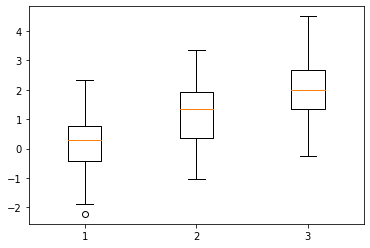

In [30]:
import matplotlib.pyplot as plt

x1 = np.random.normal(0,1,50) # mu=0, sigma=1, n=50
x2 = np.random.normal(1,1,50)
x3 = np.random.normal(2,1,50)
plt.boxplot([x1,x2,x3])
plt.show()

# zscroe, tscroe

In [31]:
X=[10, 7, 12, 12, 9, 16, 12, 18, 8, 12, 14, 16]

In [32]:
import numpy as np

xbar=np.mean(X)
sigmax=np.std(X) #ddof=0
sx=np.std(X,ddof=1)
for x in X:
   zscore=(x-xbar)/sx
   print (zscore, end= ' ')

-0.6410300618768864 -1.5286101475525755 -0.04931000475976033 -0.04931000475976033 -0.9368900904354495 1.1341301094744918 -0.04931000475976033 1.725850166591618 -1.2327501189940124 -0.04931000475976033 0.5424100523573657 1.1341301094744918 

In [33]:
from scipy import stats

In [34]:
stats.zscore(X)

array([-0.66953406, -1.59658123, -0.05150262, -0.05150262, -0.97854978,
        1.18456027, -0.05150262,  1.80259171, -1.28756551, -0.05150262,
        0.56652882,  1.18456027])

In [35]:
from scipy.stats import norm

norm.cdf(0, loc=0, scale=1)

0.5

In [36]:
norm.cdf(1) - norm.cdf(-1)

0.6826894921370859

In [37]:
norm.cdf(2) - norm.cdf(-2)

0.9544997361036416

In [38]:
norm.ppf([0.001, 0.5, 0.9545])

array([-3.09023231,  0.        ,  1.69014614])

In [39]:
norm.cdf([-3.09023231,  0.        ,  1.69014614])

array([0.001 , 0.5   , 0.9545])

In [40]:
from scipy.stats import t

t.cdf(1, 1) # dof 1

0.7500000000000002

In [41]:
t.cdf(1, 1, loc=0, scale=1)

0.7500000000000002

In [42]:
import numpy as np

def reject_outliers(data):
    m = np.mean(data)
    s = np.std(data)
    filtered = [d for d in data if (m - 2 * s < d < m + 2 * s)]
    return filtered

d = [2,4,5,1,6,5,40]
filtered_d = reject_outliers(d)
print (filtered_d)

[2, 4, 5, 1, 6, 5]
